### Multiple linear Regression

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline


In [3]:
df=pd.read_csv("datasets/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df.head()
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

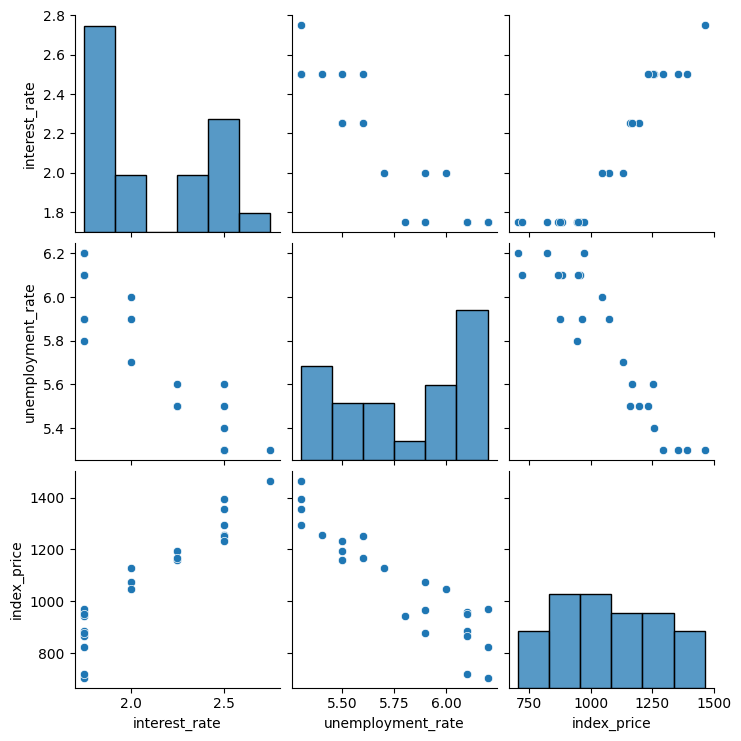

In [6]:
# visulization on the data set 
import seaborn as sns
sns.pairplot(df)


In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


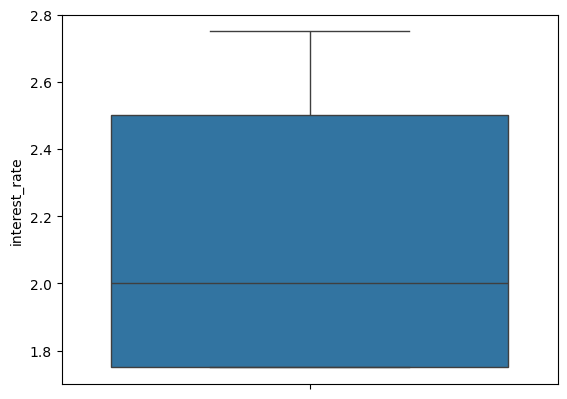

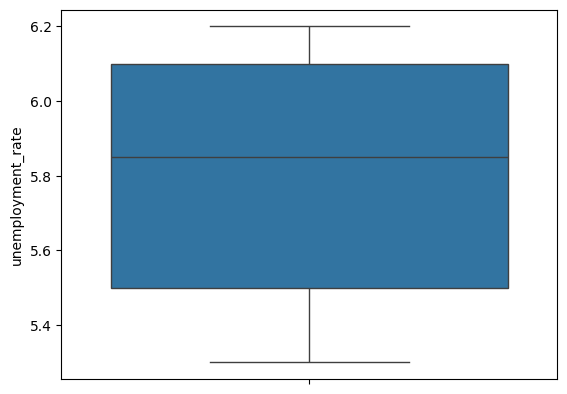

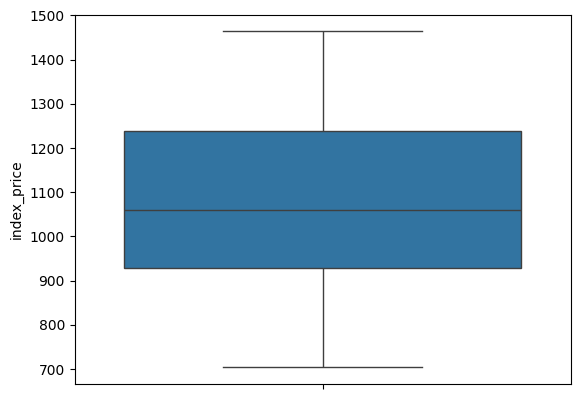

In [8]:
for col in df.select_dtypes(include="number"):
    
   sns.boxplot(df[col])
   plt.show()

In [9]:
from scipy import stats
for col in  df.select_dtypes(include="number"):
    z_scores=np.abs(stats.zscore(df[col]))
    outliers=df[z_scores>3]
    print(outliers)

Empty DataFrame
Columns: [interest_rate, unemployment_rate, index_price]
Index: []
Empty DataFrame
Columns: [interest_rate, unemployment_rate, index_price]
Index: []
Empty DataFrame
Columns: [interest_rate, unemployment_rate, index_price]
Index: []


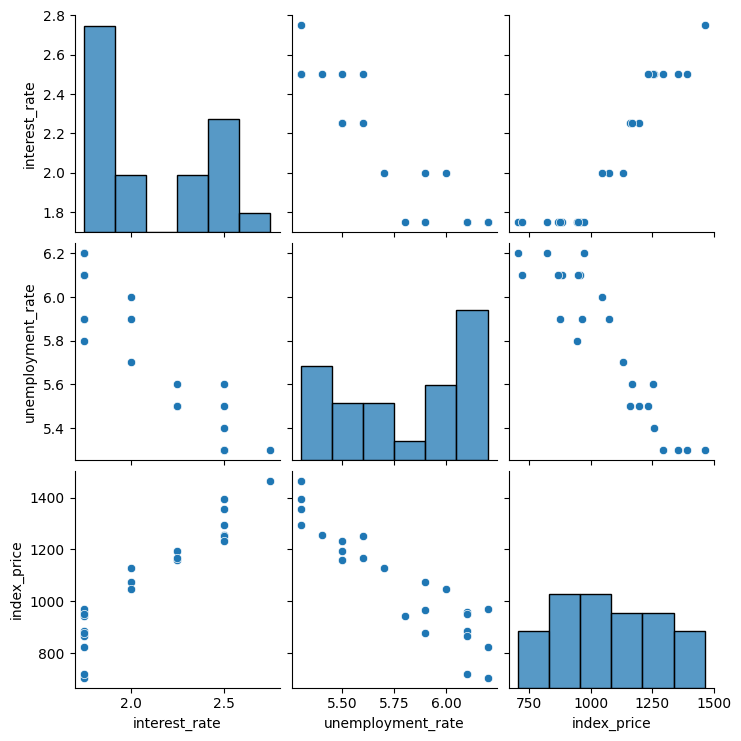

In [10]:
### visualizing the datapoints more closely
sns.pairplot(df)
plt.show()

In [11]:
## independant and dependant features
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [14]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

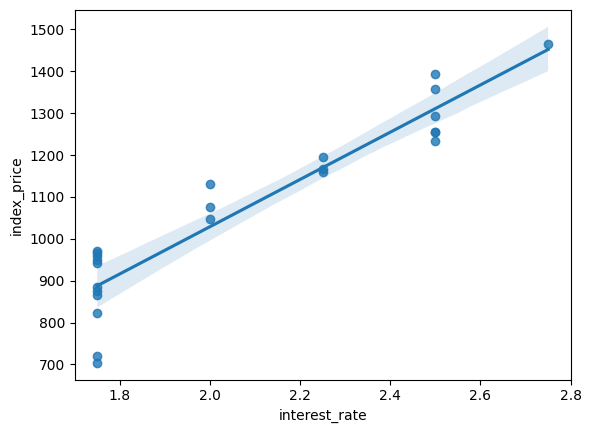

In [15]:
## regplot - plot data and a linear regression model fit 
sns.regplot(x=df['interest_rate'], y=df['index_price'])


In [16]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_s=std.fit_transform(X_train)
X_test_s=std.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_s,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred=lr.predict(X_test_s)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(r2_score(y_pred,Y_test))

0.8626502528670701


In [20]:
print(mean_squared_error(Y_test,y_pred))

5793.762887712569


In [21]:
print(mean_absolute_error(Y_test,y_pred))

59.935781523235484


## PLS Regresssion Partial Least Squares (PLS) is a regression technique used when:

The dataset has many features (high dimensionality)

Features are highly correlated (multicollinearity)

Number of features > number of samples

You want a model similar to linear regression but more stable

It reduces the features into a smaller set of new components (latent variables) and then performs regression on them.


Why PLS Likely Performed Better
A few possible reasons:
Multicollinearity present
Highly correlated input features → linear regression becomes unstable
PLS handles this by extracting latent components.
High-dimensional feature space
PLS reduces dimension intelligently using covariance with target.
Important predictive directions captured better
PLS maximizes X–Y covariance ➝ better generalization.
Noise and redundant variables reduced
What it means in simple words
Your original linear model was good, but PLS extracted feature combinations that relate more strongly to the output, improving prediction accuracy.

In [24]:
from sklearn.cross_decomposition import PLSRegression


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

pls = PLSRegression(n_components=2)   # choose components
pls.fit(X_train, y_train)

y_pred = pls.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))


MSE: 3317.4235332090016
R2 : 0.9323712356725848
